# Edge Detection

In [ ]:
import numpy as np
import cv2
import time
from matplotlib import pyplot as plt
import os
count = 0
cap = cv2.VideoCapture("video_building.mp4")
path = "edges/"

# suc, img = cap.read()
# img = cv2.imread("building_frames/601.jpg")

# pts1 = [ [195,0],
#         [200,475],
#         [292,500],
#         [292,0]     ]
# pts2 = [ [0,0],
#         [50,0],
#         [50,500],
#         [0,500]     ]

# img = my_polygon(img,pts1)
# img = my_polygon(img,pts2)

# plt.imshow(img)

#img = cv.imread('messi5.jpg',0)

In [ ]:
def my_polygon(img,pts):
    line_type = 8
    # Create some points
    ppt = np.array(pts, np.int32)
    ppt = ppt.reshape((-1, 1, 2))
    img = cv2.fillPoly(img, [ppt], (0, 0, 0), line_type)
#    img = cv2.polylines(img, [ppt], True,(0, 0, 0), line_type)

    return img

In [ ]:
pts1 = [ [195,0],
        [200,475],
        [292,500],
        [292,0]   ]
pts2 = [ [0,0],
        [60,0],
        [60,500],
        [0,500]  ]

In [ ]:
# OpenCV program to perform Edge detection in real time
# import libraries of python OpenCV 
# where its functionality resides
import cv2 
  
# np is an alias pointing to numpy library
import numpy as np

cap = cv2.VideoCapture("video_building.mp4")
  
  
# loop runs if capturing has been initialized
while(1):
  
    # reads frames from a camera
    ret, frame = cap.read()
    if ret==False:
        break
        
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     blurred = cv2.GaussianBlur(gray, (5, 5), 0)
  
    # Display an original image
    cv2.imshow('Original',frame)
  
    # finds edges in the input image image and
    # marks them in the output map edges
    edges = cv2.Canny(frame,150,250)
    
    #histogram
    equ = cv2.equalizeHist(frame)
    hist_edges = cv2.Canny(equ,150,250)
    
    #adaptive histogram
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    adpt_hist = clahe.apply(frame)
    adpt_hist_edges = cv2.Canny(adpt_hist,150,250)
    
    
    # Display edges in a frame
    img = cv2.hconcat([frame, equ, adpt_hist, edges, hist_edges, adpt_hist_edges])
    cv2.imshow('Edges',img)
  
    # Wait for Esc key to stop
    k = cv2.waitKey(200) & 0xFF
    if k == 27:
        break
  
  
# Close the window
cap.release()
  
# De-allocate any associated memory usage
cv2.destroyAllWindows() 

In [ ]:
# morophological operation + contour detection

In [ ]:


import numpy as np
import cv2

img = cv2.imread("edges/450.png")
kernel = np.ones((2,2), np.uint8)

d_img = cv2.dilate(img, kernel, iterations=1) 
# cv2.imshow('dilation', d_img)

eroson = cv2.erode(d_img, kernel, iterations=1) 
# cv2.imshow('eroson', eroson)
# cv2.waitKey(0)

In [ ]:
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

contours, hierarchy = cv2.findContours(img1, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)


#create an empty image for contours
img_contours = np.zeros(img.shape)


# draw the contours on the empty image
cv2.drawContours(img_contours, contours, -1, (0,255,0), 1)

cv2.imshow('edge', img)

cv2.imshow('img contours', img_contours)
cv2.waitKey(0)

In [22]:
##normalize

import numpy as np
import cv2

img = cv2.imread('frames/529.jpg')

img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mean, std = cv2.meanStdDev(img1)

img_m = img1-mean
img_s = img_m/std

# cv.normalize(img,  norm_img, 0, 255, cv.NORM_MINMAX)

In [ ]:
cv2.imshow('img1', img_s)
cv2.waitKey(0)

In [ ]:
import numpy as np
import cv2

img = cv2.imread('frames/529.jpg')
norm = np.zeros((800,800))
cv2.imshow('Original Image', img)

final = cv2.normalize(img,  norm, 0, 255, cv2.NORM_MINMAX)
cv2.imshow('Normalized Image', final)

cv2.waitKey(0)


In [ ]:
import cv2
from skimage.filters import threshold_yen
from skimage.exposure import rescale_intensity
from skimage.io import imread, imsave

img = imread('frames/529.jpg')

yen_threshold = threshold_yen(img)
bright = rescale_intensity(img, (0, yen_threshold), (0, 255))

imsave('out.jpg', bright)

In [ ]:
while True:
    suc, img = cap.read()
    edges = cv2.Canny(img,200,250, True)

    try:
        edges = my_polygon(edges,pts1)
        edges = my_polygon(edges,pts2)
        cv2.imshow("edges", edges)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
   #     time.delay(1)
    except:
        cv2.destroyAllWindows()

#    cv2.imwrite(path+str(count)+".png",edges)

    count+=1
#     plt.subplot(121),plt.imshow(img,cmap = 'gray')
#     plt.title('Original Image'), plt.xticks([]), plt.yticks([])
#     plt.subplot(122),plt.imshow(edges,cmap = 'gray')
#     plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
#     plt.show()
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

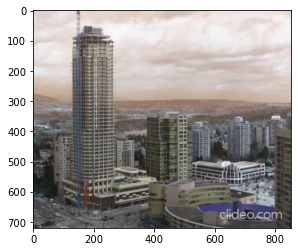

In [17]:
"""
WHat is Gabor filter?
"""

##############################################
#Gabor filter, multiple filters in one. Generate fiter bank. 
"""
For image processing and computer vision, Gabor filters are generally 
used in texture analysis, edge detection, feature extraction, etc. 
Gabor filters are special classes of bandpass filters, i.e., they allow a certain 
‘band’ of frequencies and reject the others.
ksize Size of the filter returned.
sigma Standard deviation of the gaussian envelope.
theta Orientation of the normal to the parallel stripes of a Gabor function.
lambda Wavelength of the sinusoidal factor.
gamma Spatial aspect ratio.
psi Phase offset.
ktype Type of filter coefficients. It can be CV_32F or CV_64F.
indicates the type and range of values that each pixel in the Gabor kernel can hold.
Basically float32 or float64
"""

import numpy as np
import cv2
import matplotlib.pyplot as plt

ksize = 10  #Use size that makes sense to the image and fetaure size. Large may not be good. 
#On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
sigma = 5 #Large sigma on small features will fully miss the features. 
theta = 1*np.pi/2  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
lamda = 1*np.pi/4  #1/4 works best for angled. 
gamma=0.9  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
#Value of 1, spherical may not be ideal as it picks up features from other regions.
phi = 0.0  #Phase offset. I leave it to 0. (For hidden pic use 0.8)

kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

plt.imshow(kernel)

#img = cv2.imread('images/synthetic.jpg')
#img = cv2.imread('images/zebra.jpg')  #Image source wikipedia: https://en.wikipedia.org/wiki/Plains_zebra
img = cv2.imread('frames/529.jpg') #USe ksize:15, s:5, q:pi/2, l:pi/4, g:0.9, phi:0.8
plt.imshow(img, cmap='gray')

cv2.imshow('original', img)

img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fimg = cv2.filter2D(img1, cv2.CV_8UC3, kernel)

kernel_resized = cv2.resize(kernel, (400, 400))                    # Resize image

# plt.imshow(fimg, cmap='gray')
# plt.imshow(kernel_resized, cmap='gray')

cv2.imshow('kernal', kernel_resized)
cv2.imshow('fimg', fimg)


# #cv2.imshow('Kernel', kernel_resized)
# #cv2.imshow('Original Img.', img)
# #cv2.imshow('Filtered', fimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
    import cv2
    import numpy as np  

    #load image and convert to hsv
    img = cv2.imread('edges/450.png')

    # draw gray box around image to detect edge buildings
#     h,w = img.shape[:2]
#     cv2.rectangle(img,(0,0),(w-1,h-1), (50,50,50),1)

    # convert image to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # define color ranges
    low_yellow = (0,100,0)
    high_yellow = (100,255,255)

    low_gray = (0,0,0)
    high_gray = (179,255,233)

    # create masks
    yellow_mask = cv2.inRange(hsv, low_yellow, high_yellow )
    gray_mask = cv2.inRange(hsv, low_gray, high_gray)

    # combine masks
    combined_mask = cv2.bitwise_or(yellow_mask, gray_mask)
    kernel = np.ones((2,2), dtype=np.uint8)
    combined_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_DILATE, kernel)

    # findcontours
    contours, hier = cv2.findContours(combined_mask,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print(hier)

[[[-1 -1  1 -1]
  [ 2 -1 -1  0]
  [ 3  1 -1  0]
  [ 4  2 -1  0]
  [ 5  3 -1  0]
  [ 6  4 -1  0]
  [ 7  5 -1  0]
  [ 8  6 -1  0]
  [ 9  7 -1  0]
  [10  8 -1  0]
  [11  9 -1  0]
  [12 10 -1  0]
  [13 11 -1  0]
  [14 12 -1  0]
  [15 13 -1  0]
  [16 14 -1  0]
  [17 15 -1  0]
  [18 16 -1  0]
  [19 17 -1  0]
  [20 18 -1  0]
  [21 19 -1  0]
  [22 20 -1  0]
  [23 21 -1  0]
  [24 22 -1  0]
  [25 23 -1  0]
  [26 24 -1  0]
  [27 25 -1  0]
  [28 26 -1  0]
  [29 27 -1  0]
  [30 28 -1  0]
  [31 29 -1  0]
  [32 30 -1  0]
  [33 31 -1  0]
  [34 32 -1  0]
  [35 33 -1  0]
  [36 34 -1  0]
  [37 35 -1  0]
  [38 36 -1  0]
  [39 37 -1  0]
  [40 38 -1  0]
  [41 39 -1  0]
  [42 40 -1  0]
  [-1 41 -1  0]]]


In [15]:
    # find and draw buildings
    for x in range(len(contours)):
            # if a contour has not contours inside of it, draw the shape filled
            c = hier[0][x][2]
            if c == -1:
                    cv2.drawContours(img,[contours[x]],0,(0,0,255),-1)

    # draw the outline of all contours
#     for cnt in contours:
#             cv2.drawContours(img,[cnt],0,(0,255,0),2)

    # display result
    cv2.imshow("Result", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows() 